# Aplicaciones Prácticas de NLP con Transformers

## Guía de Ejercicios Progresivos

---

## Introducción

En este cuaderno vas a trabajar con aplicaciones reales de Procesamiento de Lenguaje Natural (NLP) utilizando modelos Transformer preentrenados. Cada ejercicio representa un caso de uso concreto que se implementa en empresas y organizaciones de Argentina y el mundo.

Los ejercicios están organizados de manera progresiva:

1. **Nivel Básico:** Moderación automática de comentarios en redes sociales
2. **Nivel Intermedio:** Extracción de información de currículums (RRHH)
3. **Nivel Avanzado:** Chatbot de soporte técnico con respuestas automáticas
4. **Desafío Autónomo:** Análisis integral de reseñas de restaurantes

### ¿Qué vas a aprender?

- A usar modelos preentrenados de Hugging Face para tareas reales
- A comprender cómo funcionan los pipelines de NLP en la práctica
- A modificar y experimentar con código para resolver problemas concretos
- A evaluar la calidad de las predicciones de los modelos
- A trabajar de manera autónoma en un problema real completo

### Requisitos previos

- Conocimientos básicos de Python
- Familiaridad con conceptos de Machine Learning
- Haber visto los cuadernos introductorios sobre clasificación de sentimientos

---

## Instalación de dependencias

Ejecutá la siguiente celda para instalar las librerías necesarias:

In [13]:
# Instalación de librerías (ejecutar solo una vez)
!pip install transformers torch pandas -q

---

## Ejercicio 1: Moderación de Comentarios en Redes Sociales

### Contexto del problema

Imaginate que trabajás en el equipo de redes sociales de una empresa argentina de delivery de comida. Recibís cientos de comentarios diarios en Instagram y Facebook. Necesitás un sistema que identifique automáticamente los comentarios negativos o críticos para que el equipo de atención al cliente pueda responderlos con prioridad.

### Aplicación real

Este tipo de sistemas se usan en:
- Redes sociales de empresas (PedidosYa, Rappi, Mercado Libre)
- Plataformas de e-commerce
- Servicios de atención al cliente automatizada

### ¿Qué vamos a hacer?

1. Cargar un modelo de análisis de sentimientos en español
2. Analizar comentarios reales de clientes
3. Clasificarlos automáticamente (positivo, negativo, neutral)
4. Identificar cuáles requieren atención urgente

---

### Paso 1: Importar librerías y cargar el modelo

In [14]:
from transformers import pipeline
import pandas as pd

# Cargamos un modelo de análisis de sentimientos específico para español
# Este modelo fue entrenado con datos de redes sociales en español
clasificador = pipeline(
    "text-classification",
    model="finiteautomata/beto-sentiment-analysis"
)

print("Modelo cargado correctamente.")

Device set to use cpu


Modelo cargado correctamente.


### Paso 2: Definir comentarios de ejemplo

Acá tenemos comentarios típicos que podría recibir una empresa de delivery:

In [15]:
comentarios = [
    "La comida llegó rapidísimo y estaba caliente. El repartidor re amable, excelente servicio!",
    "Tardaron DOS HORAS para traer una pizza fría. Pésimo, no pido más acá.",
    "Todo bien, llegó en tiempo y forma. Nada para destacar.",
    "Me encanta este servicio, siempre cumplen. Los re banco!",
    "Se equivocaron con mi pedido OTRA VEZ. Ya es la tercera vez que pasa, un desastre total."
]

### Paso 3: Analizar los comentarios

In [16]:
# Procesamos todos los comentarios
resultados = clasificador(comentarios)

# Creamos un DataFrame para visualizar mejor los resultados
df_resultados = pd.DataFrame({
    'Comentario': comentarios,
    'Sentimiento': [r['label'] for r in resultados],
    'Confianza': [round(r['score'], 3) for r in resultados]
})

df_resultados

,Comentario,Sentimiento,Confianza
0,La comida llegó rapidísimo y estaba caliente. ...,POS,0.998
1,Tardaron DOS HORAS para traer una pizza fría. ...,NEG,0.999
2,"Todo bien, llegó en tiempo y forma. Nada para ...",POS,0.997
3,"Me encanta este servicio, siempre cumplen. Los...",POS,0.999
4,Se equivocaron con mi pedido OTRA VEZ. Ya es l...,NEG,0.999


### Paso 4: Identificar comentarios que requieren atención urgente

In [17]:
# Filtramos solo los comentarios negativos
comentarios_urgentes = df_resultados[df_resultados['Sentimiento'] == 'NEG']

print("COMENTARIOS QUE REQUIEREN ATENCIÓN URGENTE:")
print("="*60)
for idx, fila in comentarios_urgentes.iterrows():
    print(f"\n[{idx+1}] {fila['Comentario']}")
    print(f"    Confianza: {fila['Confianza']*100:.1f}%")

COMENTARIOS QUE REQUIEREN ATENCIÓN URGENTE:

[2] Tardaron DOS HORAS para traer una pizza fría. Pésimo, no pido más acá.
    Confianza: 99.9%

[5] Se equivocaron con mi pedido OTRA VEZ. Ya es la tercera vez que pasa, un desastre total.
    Confianza: 99.9%


### Actividad práctica

Ahora es tu turno. Realizá las siguientes tareas:

1. **Agregá 3 comentarios nuevos** a la lista (pueden ser inventados o reales)
2. **Ejecutá nuevamente** las celdas de análisis
3. **Respondé:**
   - ¿El modelo clasificó correctamente tus comentarios?
   - ¿Hubo algún comentario que esperabas que clasifique diferente?
   - ¿Qué pasa si escribís un comentario con ironía? (probá con algo como "Genial, 3 horas esperando, lo mejor!")

Escribí tus comentarios nuevos en la siguiente celda:

In [18]:
# TUS COMENTARIOS ACÁ
mis_comentarios = [
    "Riquisimo el pollo crudo",
    "Ni bueno ni malo",
    "Podria ser mejor"
]

# Analizamos
mis_resultados = clasificador(mis_comentarios)

# Mostramos
df_mis_resultados = pd.DataFrame({
    'Comentario': mis_comentarios,
    'Sentimiento': [r['label'] for r in mis_resultados],
    'Confianza': [round(r['score'], 3) for r in mis_resultados]
})

df_mis_resultados

,Comentario,Sentimiento,Confianza
0,Riquisimo el pollo crudo,POS,0.997
1,Ni bueno ni malo,POS,0.657
2,Podria ser mejor,NEG,0.707


¿El modelo clasificó correctamente tus comentarios?

No, se equivocó con las 3 reseñas

¿Hubo algún comentario que esperabas que clasifique diferente?

Si, los 3, ya que el primer y tercer comentario debian resultar negativos y el segundo neutro.

¿Qué pasa si escribís un comentario con ironía?

El primer comentario fue irónico y el modelo lo clasificó como positivo, ya que tomó la palabbra riquísimo como referencia y no el resto de la frase que indicaba que la comida estaba cruda.



---

## Ejercicio 2: Extracción Automática de Información de CVs

### Contexto del problema

Trabajás en el área de Recursos Humanos de una consultora argentina. Recibís decenas de CVs por día y necesitás extraer rápidamente información clave: nombres de candidatos, empresas donde trabajaron, universidades, ciudades, y tecnologías que manejan.

### Aplicación real

Este tipo de sistemas se usan en:
- Plataformas de empleo (LinkedIn, Bumeran, Computrabajo)
- Sistemas de ATS (Applicant Tracking Systems)
- Automatización de procesos de RRHH

### ¿Qué vamos a hacer?

1. Cargar un modelo de Reconocimiento de Entidades Nombradas (NER)
2. Procesar un fragmento de CV
3. Extraer automáticamente: personas, organizaciones, ubicaciones
4. Organizar la información de manera estructurada

---

### Paso 1: Cargar el modelo de NER

In [19]:
# Cargamos un modelo de NER específico para español
# Este modelo fue entrenado para reconocer personas, organizaciones y lugares
extractor_ner = pipeline(
    "ner",
    model="mrm8488/bert-spanish-cased-finetuned-ner",
    aggregation_strategy="simple"  # Agrupa tokens de la misma entidad
)

print("Modelo NER cargado correctamente.")

Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Modelo NER cargado correctamente.


### Paso 2: Definir un fragmento de CV

Este es un ejemplo típico de cómo un candidato describe su experiencia:

In [20]:
cv_texto = """María Fernández es una desarrolladora full-stack con 5 años de experiencia.
Estudió Ingeniería en Sistemas en la Universidad de Buenos Aires (UBA) y se graduó en 2018.
Trabajó como desarrolladora backend en Mercado Libre durante 3 años, donde lideró la migración
de sistemas legacy a microservicios. Posteriormente se unió a Globant como tech lead,
coordinando equipos distribuidos entre Buenos Aires y Córdoba. Tiene experiencia en Python,
Java, Docker y Kubernetes. Actualmente reside en Palermo, Ciudad de Buenos Aires."""

print("CV a procesar:")
print(cv_texto)

CV a procesar:
María Fernández es una desarrolladora full-stack con 5 años de experiencia.
Estudió Ingeniería en Sistemas en la Universidad de Buenos Aires (UBA) y se graduó en 2018.
Trabajó como desarrolladora backend en Mercado Libre durante 3 años, donde lideró la migración
de sistemas legacy a microservicios. Posteriormente se unió a Globant como tech lead,
coordinando equipos distribuidos entre Buenos Aires y Córdoba. Tiene experiencia en Python,
Java, Docker y Kubernetes. Actualmente reside en Palermo, Ciudad de Buenos Aires.


### Paso 3: Extraer entidades del CV

In [21]:
# Procesamos el texto del CV
entidades = extractor_ner(cv_texto)

# Creamos un DataFrame para visualizar mejor
df_entidades = pd.DataFrame(entidades)

# Mostramos solo las columnas relevantes
df_entidades[['entity_group', 'word', 'score']].round(3)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


,entity_group,word,score
0,PER,María Fernández,1.000
1,MISC,Ingeniería en Sistemas,0.998
2,ORG,Universidad de Buenos Aires,0.998
3,ORG,UBA,0.983
4,MISC,Mercado Libre,0.789
5,ORG,Glo,1.000
6,ORG,##bant,0.821
7,LOC,Buenos Aires,1.000
8,LOC,Córdoba,1.000
9,MISC,Py,0.999


### Paso 4: Organizar la información por categoría

Ahora vamos a separar las entidades por tipo para que sea más fácil revisarlas:

In [22]:
# Diccionario para organizar por tipo de entidad
info_extraida = {
    'PER': [],  # Personas
    'ORG': [],  # Organizaciones
    'LOC': []   # Ubicaciones
}

# Clasificamos cada entidad
for entidad in entidades:
    tipo = entidad['entity_group']
    palabra = entidad['word']
    if tipo in info_extraida:
        info_extraida[tipo].append(palabra)

# Mostramos la información organizada
print("INFORMACIÓN EXTRAÍDA DEL CV")
print("="*60)
print(f"\nCANDIDATO/A: {', '.join(info_extraida['PER'])}")
print(f"\nEMPRESAS/INSTITUCIONES: {', '.join(info_extraida['ORG'])}")
print(f"\nUBICACIONES: {', '.join(info_extraida['LOC'])}")

INFORMACIÓN EXTRAÍDA DEL CV

CANDIDATO/A: María Fernández

EMPRESAS/INSTITUCIONES: Universidad de Buenos Aires, UBA, Glo, ##bant

UBICACIONES: Buenos Aires, Córdoba, Palermo, Ciudad de Buenos Aires


### Actividad práctica

Ahora es tu turno. Realizá las siguientes tareas:

1. **Escribí un fragmento de CV ficticio** (o usá el tuyo si querés) con:
   - Nombre de la persona
   - Al menos 2 empresas o instituciones educativas
   - Al menos 2 ubicaciones (ciudades, barrios, países)

2. **Ejecutá el análisis** y verificá qué entidades detectó el modelo

3. **Respondé:**
   - ¿El modelo identificó correctamente todas las entidades?
   - ¿Hubo alguna entidad que no detectó? ¿Por qué creés que pasó?
   - ¿Detectó alguna entidad incorrectamente?

Escribí tu CV ficticio en la siguiente celda:

In [64]:
# TU CV FICTICIO ACÁ

mi_cv = """Valeria Cornes es estudiante avanzada de la Tecnicatura en Ciencia de Datos e Inteligencia Artificial. Cursa en el IFTS 24 de la Cuidad Autonoma de Buenos Aires.
Cuenta con el titulo de Profesorado de Matemáticas para Nivel Secundario otorgado por el IFDyT 24, de la cuidad de Quilmes, Buenos Aires y egreso en el año 2011.
Actualmente trabaja en Google como Analista de Datos, con 6 años de experiencia. La empresa tiene sede en el barrio de Belgrano.
Anteriormente trabajó en la empresa Ike Asistencia, como Analista Senior en el sector de Admninistración de Ventas
Cuenta con conocimientos en Python, SQL Server, NLP, nivel de ingles intermedio."""

# Procesamos
mis_entidades = extractor_ner(mi_cv)

# Mostramos
df_mis_entidades = pd.DataFrame(mis_entidades)
print("Entidades detectadas:")
print(df_mis_entidades[['entity_group', 'word', 'score']].round(3))

# Organizamos
mi_info = {'PER': [], 'ORG': [], 'LOC': []}
for e in mis_entidades:
    if e['entity_group'] in mi_info:
        mi_info[e['entity_group']].append(e['word'])

print("\n" + "="*60)
print(f"CANDIDATO/A: {', '.join(mi_info['PER'])}")
print(f"EMPRESAS/INSTITUCIONES: {', '.join(mi_info['ORG'])}")
print(f"UBICACIONES: {', '.join(mi_info['LOC'])}")

Entidades detectadas:
   entity_group                                              word  score
0           PER                                              Vale  0.999
1           PER                                      ##ria Cornes  0.997
2          MISC                                              Tecn  0.996
3          MISC                                            ##tura  0.927
4          MISC                                  Ciencia de Datos  0.982
5          MISC                           Inteligencia Artificial  0.916
6           ORG                     IFTS 24 de la Cuidad Autonoma  0.845
7           LOC                                      Buenos Aires  0.930
8          MISC  Profesorado de Matemáticas para Nivel Secundario  0.954
9           ORG                                          IFDyT 24  0.953
10          LOC                                               Qui  0.999
11          LOC                                            ##lmes  0.777
12          LOC              

---

## Ejercicio 3: Chatbot de Soporte Técnico Automático

### Contexto del problema

Trabajás en una empresa que vende electrodomésticos online. Los clientes suelen hacer preguntas frecuentes sobre garantías, envíos y devoluciones. Querés automatizar las respuestas a estas consultas usando un sistema de Question Answering (QA) que pueda responder basándose en la información de tus políticas.

### Aplicación real

Este tipo de sistemas se usan en:
- Chatbots de atención al cliente (WhatsApp, web)
- Sistemas de FAQ automáticas
- Asistentes virtuales corporativos

### ¿Qué vamos a hacer?

1. Cargar un modelo de Question Answering en español
2. Definir un contexto (políticas de la empresa)
3. Hacer preguntas sobre ese contexto
4. Generar respuestas automáticas

---

### Paso 1: Cargar los modelos necesarios

In [25]:
# Modelo de Question Answering (responder preguntas basadas en contexto)
qa_modelo = pipeline(
    "question-answering",
    model="PlanTL-GOB-ES/roberta-base-bne-sqac"
)

print("Modelo de QA cargado correctamente.")

OSError: PlanTL-GOB-ES/roberta-base-bne-sqac is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`

Este error significa que el modelo PlanTL-GOB-ES/roberta-base-bne-sqac ya no es público o fue movido/eliminado del repositorio de Hugging Face.
Por eso el pipeline no puede descargarlo automáticamente.

Ese modelo existía y era español, pero Hugging Face cambió los permisos de varios modelos del proyecto PlanTL-GOB-ES.
Si lo abris en el navegador:

https://huggingface.co/PlanTL-GOB-ES/roberta-base-bne-sqac

vas a ver que te pide iniciar sesión o muestra un error 404 — confirmando que está privado o eliminado.

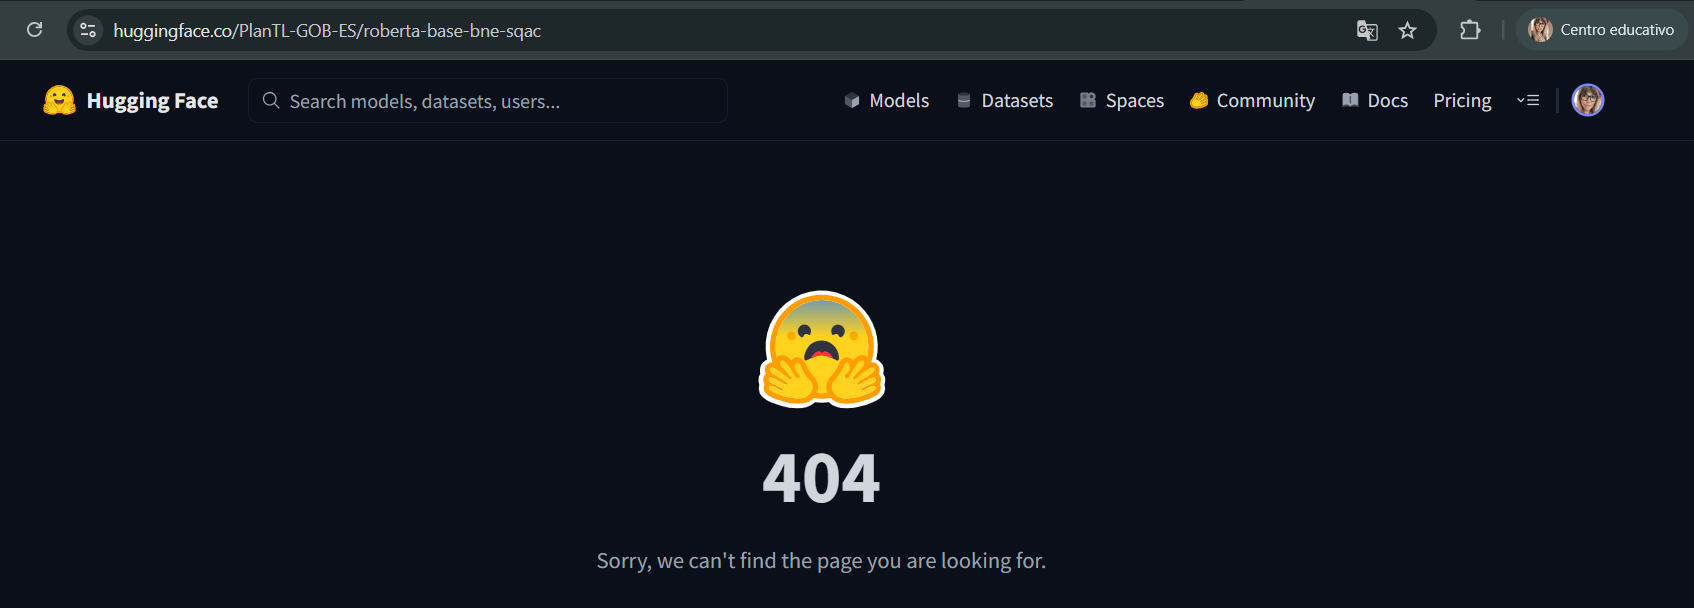

Alternativa
Usar otro modelo de QA en español, equivalente y público.

In [26]:
from transformers import pipeline

# Modelo alternativo en español para QA
qa_modelo = pipeline(
    "question-answering",
    model="mrm8488/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es"
)

print("Modelo de QA cargado correctamente.")


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Some weights of the model checkpoint at mrm8488/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/135 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Modelo de QA cargado correctamente.


### Paso 2: Definir el contexto (políticas de la empresa)

Este es el documento que el chatbot va a usar para responder preguntas:

In [27]:
politicas_empresa = """POLÍTICAS DE GARANTÍA Y DEVOLUCIONES - ELECTROHOGAR S.A.

GARANTÍA: Todos nuestros productos tienen garantía oficial de 12 meses contra defectos
de fábrica. La garantía comienza a contar desde la fecha de recepción del producto.
Para hacer válida la garantía, el cliente debe presentar la factura de compra original
y el producto no debe tener daños físicos causados por mal uso.

ENVÍOS: Realizamos envíos a todo el país. En Capital Federal y Gran Buenos Aires,
el envío demora entre 24 y 48 horas hábiles. Para el interior del país, el tiempo
de entrega es de 3 a 7 días hábiles. El envío es gratuito para compras superiores
a $50.000. Para montos menores, se cobra un adicional de $2.500.

DEVOLUCIONES: El cliente tiene 10 días corridos desde la recepción del producto para
solicitar una devolución si el artículo no cumple con sus expectativas. El producto
debe estar sin usar, en su empaque original y con todos sus accesorios. El cliente
debe hacerse cargo del costo de envío de devolución. Una vez recibido y verificado
el producto, reintegramos el 100% del dinero en un plazo de 15 días hábiles.
"""

print("Contexto cargado:")
print(politicas_empresa)

Contexto cargado:
POLÍTICAS DE GARANTÍA Y DEVOLUCIONES - ELECTROHOGAR S.A.

GARANTÍA: Todos nuestros productos tienen garantía oficial de 12 meses contra defectos
de fábrica. La garantía comienza a contar desde la fecha de recepción del producto.
Para hacer válida la garantía, el cliente debe presentar la factura de compra original
y el producto no debe tener daños físicos causados por mal uso.

ENVÍOS: Realizamos envíos a todo el país. En Capital Federal y Gran Buenos Aires,
el envío demora entre 24 y 48 horas hábiles. Para el interior del país, el tiempo
de entrega es de 3 a 7 días hábiles. El envío es gratuito para compras superiores
a $50.000. Para montos menores, se cobra un adicional de $2.500.

DEVOLUCIONES: El cliente tiene 10 días corridos desde la recepción del producto para
solicitar una devolución si el artículo no cumple con sus expectativas. El producto
debe estar sin usar, en su empaque original y con todos sus accesorios. El cliente
debe hacerse cargo del costo de envío

### Paso 3: Hacer preguntas al sistema

In [28]:
# Definimos preguntas típicas de clientes
preguntas = [
    "¿Cuánto dura la garantía?",
    "¿Cuánto tarda el envío a Capital Federal?",
    "¿Cuántos días tengo para devolver un producto?",
    "¿Qué necesito para hacer válida la garantía?",
    "¿El envío es gratis?"
]

# Procesamos cada pregunta
print("RESPUESTAS AUTOMÁTICAS DEL CHATBOT")
print("="*60)

for pregunta in preguntas:
    respuesta = qa_modelo(question=pregunta, context=politicas_empresa)
    print(f"\nPREGUNTA: {pregunta}")
    print(f"RESPUESTA: {respuesta['answer']}")
    print(f"Confianza: {respuesta['score']*100:.1f}%")
    print("-"*60)

RESPUESTAS AUTOMÁTICAS DEL CHATBOT

PREGUNTA: ¿Cuánto dura la garantía?
RESPUESTA: 12 meses
Confianza: 11.2%
------------------------------------------------------------

PREGUNTA: ¿Cuánto tarda el envío a Capital Federal?
RESPUESTA: entre 24 y 48 horas hábiles
Confianza: 36.1%
------------------------------------------------------------

PREGUNTA: ¿Cuántos días tengo para devolver un producto?
RESPUESTA: 10 días
Confianza: 36.1%
------------------------------------------------------------

PREGUNTA: ¿Qué necesito para hacer válida la garantía?
RESPUESTA: presentar la factura de compra original
Confianza: 28.7%
------------------------------------------------------------

PREGUNTA: ¿El envío es gratis?
RESPUESTA: El envío es gratuito para compras superiores
a $50.000
Confianza: 26.5%
------------------------------------------------------------


### Paso 4: Crear una función interactiva de chatbot

Vamos a crear una función que simule un chatbot completo:

In [29]:
def chatbot_soporte(pregunta, contexto=politicas_empresa):
    """
    Función que simula un chatbot de soporte técnico.

    Args:
        pregunta (str): La pregunta del cliente
        contexto (str): El documento con las políticas de la empresa

    Returns:
        str: Respuesta formateada para el cliente
    """
    resultado = qa_modelo(question=pregunta, context=contexto)

    # Formateamos la respuesta de manera amigable
    confianza = resultado['score']

    if confianza > 0.5:
        respuesta = f"""Hola! Te respondo tu consulta:

{resultado['answer']}

¿Te fue útil esta información? Si necesitás más detalles, no dudes en consultarnos."""
    else:
        respuesta = """Hola! No encontré una respuesta clara a tu consulta en nuestras
políticas. Te recomiendo que te comuniques con nuestro equipo de atención al cliente
al 0800-XXX-XXXX para que puedan ayudarte mejor."""

    return respuesta

# Probamos la función
print(chatbot_soporte("¿Puedo devolver un producto después de 2 semanas?"))

Hola! No encontré una respuesta clara a tu consulta en nuestras
políticas. Te recomiendo que te comuniques con nuestro equipo de atención al cliente
al 0800-XXX-XXXX para que puedan ayudarte mejor.


### Actividad práctica

Ahora es tu turno. Realizá las siguientes tareas:

1. **Escribí 3 preguntas nuevas** que un cliente podría hacer sobre las políticas
2. **Probá el chatbot** con esas preguntas
3. **Modificá el contexto** (politicas_empresa) agregando información nueva, por ejemplo:
   - Formas de pago aceptadas
   - Horarios de atención
   - Información sobre instalación de productos
4. **Respondé:**
   - ¿Las respuestas fueron precisas?
   - ¿Hubo alguna pregunta que el modelo no pudo responder bien?
   - ¿Qué pasa si hacés una pregunta sobre algo que NO está en el contexto?

Usá las siguientes celdas para experimentar:

In [30]:
# TUS PREGUNTAS ACÁ
mis_preguntas = [
    "La instalación del aire acondicionado es gratis?",
    "Pueden venir a traerlo a las 23hs?",
    "Se puede abonar con cheque a 60 dias?"
]

# Probamos el chatbot con tus preguntas
for pregunta in mis_preguntas:
    print("\n" + "="*60)
    print(chatbot_soporte(pregunta))


Hola! No encontré una respuesta clara a tu consulta en nuestras
políticas. Te recomiendo que te comuniques con nuestro equipo de atención al cliente
al 0800-XXX-XXXX para que puedan ayudarte mejor.

Hola! No encontré una respuesta clara a tu consulta en nuestras
políticas. Te recomiendo que te comuniques con nuestro equipo de atención al cliente
al 0800-XXX-XXXX para que puedan ayudarte mejor.

Hola! No encontré una respuesta clara a tu consulta en nuestras
políticas. Te recomiendo que te comuniques con nuestro equipo de atención al cliente
al 0800-XXX-XXXX para que puedan ayudarte mejor.


In [31]:
# MODIFICÁ EL CONTEXTO ACÁ (agregá información nueva)
mi_contexto_ampliado = """POLÍTICAS DE GARANTÍA Y DEVOLUCIONES - ELECTROHOGAR S.A.

GARANTÍA: Todos nuestros productos tienen garantía oficial de 12 meses contra defectos
de fábrica. La garantía comienza a contar desde la fecha de recepción del producto.
Para hacer válida la garantía, el cliente debe presentar la factura de compra original
y el producto no debe tener daños físicos causados por mal uso.

ENVÍOS: Realizamos envíos a todo el país. En Capital Federal y Gran Buenos Aires,
el envío demora entre 24 y 48 horas hábiles. Para el interior del país, el tiempo
de entrega es de 3 a 7 días hábiles. El envío es gratuito para compras superiores
a $50.000. Para montos menores, se cobra un adicional de $2.500.
Los envios se realizaran de lunes a viernes de 9 a 18hs.

DEVOLUCIONES: El cliente tiene 10 días corridos desde la recepción del producto para
solicitar una devolución si el artículo no cumple con sus expectativas. El producto
debe estar sin usar, en su empaque original y con todos sus accesorios. El cliente
debe hacerse cargo del costo de envío de devolución. Una vez recibido y verificado
el producto, reintegramos el 100% del dinero en un plazo de 15 días hábiles.

INSTALACION: La compra del producto no incluye la instalación. La misma se abonara en efectivo al tecnico cuando visite el domicilio.

FORMAS DE PAGO: Tarjeta de crédito/débito/transferencia bancaria.
"""

# Probá con una pregunta sobre la información nueva que agregaste
print(chatbot_soporte("Tu pregunta sobre la info nueva", contexto=mi_contexto_ampliado))

Hola! No encontré una respuesta clara a tu consulta en nuestras
políticas. Te recomiendo que te comuniques con nuestro equipo de atención al cliente
al 0800-XXX-XXXX para que puedan ayudarte mejor.


---

## Ejercicio 4: Desafío Autónomo - Análisis de Reseñas de Restaurantes

### Contexto del problema

Sos el encargado de marketing digital de una cadena de restaurantes porteña. Querés implementar un sistema inteligente que procese automáticamente las reseñas que los clientes dejan en Google Maps y redes sociales para:

1. Identificar si la reseña es positiva, negativa o neutral
2. Extraer información clave: nombres de platos mencionados, ubicaciones de las sucursales, nombres de empleados destacados
3. Responder automáticamente a preguntas frecuentes basándose en el menú y políticas del restaurante

### Aplicación real

Este tipo de sistemas combinados se usan en:
- Gestión de reputación online para cadenas de restaurantes
- Análisis de feedback de clientes en hotelería y turismo
- Sistemas de CRM (Customer Relationship Management) inteligentes
- Plataformas de delivery con análisis de satisfacción del cliente

---

### Tu tarea

**Este ejercicio lo tenés que resolver completamente solo**, aplicando todo lo que aprendiste en los ejercicios anteriores. No hay código de ejemplo, solo las instrucciones.

### Parte 1: Análisis de sentimiento de reseñas (30%)

1. Creá una lista con al menos 5 reseñas ficticias de clientes sobre un restaurante argentino (podés inventarlas o buscar reales)
2. Cargá un modelo de análisis de sentimientos en español (buscá en Hugging Face)
3. Clasificá cada reseña y mostrá los resultados en un DataFrame
4. Identificá cuántas reseñas son positivas, negativas y neutrales (si el modelo lo soporta)

**Pistas:**
- Usá `pipeline("text-classification", model=...)`
- Recordá importar `pandas` para crear el DataFrame
- Modelos sugeridos: `finiteautomata/beto-sentiment-analysis` o `pysentimiento/robertuito-sentiment-analysis`

---

### Parte 2: Extracción de información (40%)

1. Tomá 2 de las reseñas que creaste (las más largas y detalladas)
2. Cargá un modelo de NER en español
3. Extraé todas las entidades nombradas de esas reseñas
4. Organizá la información en categorías (personas, lugares, organizaciones)
5. Bonus: ¿Se mencionan nombres de platos? (Nota: el modelo podría no detectarlos como entidades, reflexioná sobre por qué)

**Pistas:**
- Usá `pipeline("ner", model=..., aggregation_strategy="simple")`
- Modelo sugerido: `mrm8488/bert-spanish-cased-finetuned-ner`
- Recordá iterar sobre los resultados para organizarlos por tipo

---

### Parte 3: Sistema de preguntas y respuestas (30%)

1. Escribí un texto con información del restaurante (menú, horarios, ubicación, políticas de reservas, precios promedio, etc.). Mínimo 4-5 oraciones.
2. Cargá un modelo de Question Answering en español
3. Formulá al menos 4 preguntas que un cliente podría hacer
4. Generá respuestas automáticas usando el modelo
5. Mostrá cada pregunta con su respuesta y el nivel de confianza del modelo

**Pistas:**
- Usá `pipeline("question-answering", model=...)`
- Modelo sugerido: `PlanTL-GOB-ES/roberta-base-bne-sqac`
- La función necesita dos parámetros: `question=` y `context=`

---

### Bonus (opcional): Integración completa

Si terminaste las tres partes, intentá crear una función que:
1. Reciba una reseña de cliente como input
2. Analice el sentimiento
3. Extraiga entidades mencionadas
4. Genere un resumen estructurado

Por ejemplo:
```
RESEÑA: "Fui ayer a la sucursal de Palermo y el mozo Juan me atendió bárbaro..."

ANÁLISIS:
- Sentimiento: POSITIVO (95% confianza)
- Empleado mencionado: Juan
- Sucursal: Palermo
- Recomendación: Enviar agradecimiento personalizado
```

---

### Criterios de evaluación

Evaluá tu propio trabajo considerando:

1. **Funcionalidad (50%):** ¿El código funciona sin errores? ¿Completaste las tres partes?
2. **Calidad de datos (20%):** ¿Las reseñas y preguntas son realistas? ¿El contexto tiene información útil?
3. **Presentación (20%):** ¿Los resultados se muestran de forma clara? ¿Usaste DataFrames o print statements organizados?
4. **Reflexión crítica (10%):** ¿Analizaste la calidad de las predicciones? ¿Identificaste limitaciones?

---

### Espacio para tu solución

Usá las celdas siguientes para resolver el desafío. Podés crear todas las celdas que necesites.


##Parte 1: Análisis de sentimiento de reseñas

###Cargá un modelo de análisis de sentimientos en español

In [69]:
from transformers import pipeline
import pandas as pd

# Cargamos un modelo de análisis de sentimientos específico para español
# Este modelo fue entrenado con datos de redes sociales en español
clasificador = pipeline(
    "text-classification",
    model="finiteautomata/beto-sentiment-analysis",
)

print("Modelo cargado correctamente.")

Modelo cargado correctamente.


###Creá una lista con al menos 5 reseñas ficticias de clientes sobre un restaurante argentino (podés inventarlas o buscar reales)

Se tomaran las reseñas de Google del restauran Da Leo Pizzeria de la sucursal Barracas

[Reseñas Da Leo Barracas](https://www.google.com/search?sca_esv=6ae5a1e5a9c3ad18&rlz=1C1GCEU_enAR1134AR1134&si=AMgyJEtREmoPL4P1I5IDCfuA8gybfVI2d5Uj7QMwYCZHKDZ-E9dnFZQb-S9rj6PbTq81QL8rAA2iTgcKtAxPMHDSZbrcEseao7I9USjA_x97CWDfBXaX8XlMCeOUJktKwiAcP2gIqKWp5AksxDC2khLEpGp7OOtNQA%3D%3D&q=Da+Leo+Barracas+Opiniones&sa=X&ved=2ahUKEwj4zMqp76mQAxVJpZUCHUO1H_UQ0bkNegQIIxAE&biw=1329&bih=707&dpr=1.38)

In [70]:
comentarios = [
    "Me encanta esta pizza de estilo napolitana. Tienen muchísimas variedades y todo lo que probé fue rico. Especialmente Bella Roma! Deliciosa! El ambiente es muy bonito y luminoso y te atienden super bien. Los precios son correctos. Por ahora solo abren de noche, ojalá pronto también lo hagan a mediodía. Muy recomendable.",
    "Muy buena experiencia. Ambiente agradable, servicio amable, gran variedad de pizzas estilo italiano (a la piedra y bien finita). Recomendable la pizza grande 5 gustos para dos personas. Vienen dos porciones con huevo, 2 con hongos portobello, 2 de jamón y 2 con salame. La faina también está bien hecha. Si pagas en efectivo hay 10% de descuento. Volvería sin duda. Hacen delivery con Rappi. Según la mesera hasta 3 km es sin cargo. Luego hay un recargo de alrededor $400.",
    "Recomiendo la pizza de roquedort, rucula e higo, creo que se llamaba Afrodita o algo asi pero era un manjar de los dioses"
    "Ayer fuimos por primera vez y el lugar nos encantó ! Súper lindo ambientado y la atención de 10 ! La carta muy amplia … mucha variedad de pizzas, para todos los gustos ! La pizza con masa bien finita y riquísima ! Súper recomendable !",
    "Llegamos temprano y no tuvimos problema para conseguir mesa pero se lleno. La comida estaba muy rica, el precio no es barato. Dejo foto de lo que quedo y foto del QR con la carta. El lugar es chico entonces no hay tantas mesas pero muy pintoresco.",
    "Segunda vez que visito el lugar, la primera todo muy bueno y la atención de las meseras destacables por su amabilidad y predisposición. La segunda nos atendió un muchacho que deja mucho que desear, pedimos dos pizas y se olvidó de la segunda, luego de una larga espera y hacer nuevamente el pedido le encargo una segunda cerveza IPA, me trae una común y cuando le aviso que no es lo que pedí me insiste que es IPA, le explico que ni el color ni el sabor es el mismo que el anterior a lo que que me asegura que sí y que él no toma por eso no sabe de cervezas. Desde ya que no tomé lo que me trajo y lamento que tengan personal que discute con los clientes. espero que le expliquen cómo debe actuar o que siga el ejemplo sus compañeras."
]

###Clasificá cada reseña y mostrá los resultados en un DataFrame

In [71]:
# Procesamos todos los comentarios
resultados = clasificador(comentarios)

# Creamos un DataFrame para visualizar mejor los resultados
df_resultados = pd.DataFrame({
    'Comentario': comentarios,
    'Sentimiento': [r['label'] for r in resultados],
    'Confianza': [round(r['score'], 3) for r in resultados]
})

df_resultados

,Comentario,Sentimiento,Confianza
0,Me encanta esta pizza de estilo napolitana. Ti...,POS,0.999
1,"Muy buena experiencia. Ambiente agradable, ser...",POS,0.867
2,"Recomiendo la pizza de roquedort, rucula e hig...",POS,0.999
3,Llegamos temprano y no tuvimos problema para c...,POS,0.995
4,"Segunda vez que visito el lugar, la primera to...",NEG,0.997


###Identificá cuántas reseñas son positivas, negativas y neutrales (si el modelo lo soporta)

In [39]:
from transformers import pipeline
import pandas as pd

# Cargamos el modelo (admite hasta 512 tokens)
clasificador = pipeline(
    "text-classification",
    model="finiteautomata/beto-sentiment-analysis",
    tokenizer="finiteautomata/beto-sentiment-analysis",
    truncation=True,
    max_length=512
)

# Tus reseñas
comentarios = [
    "Me encanta esta pizza de estilo napolitana. Tienen muchísimas variedades y todo lo que probé fue rico. Especialmente Bella Roma! Deliciosa! El ambiente es muy bonito y luminoso y te atienden super bien. Los precios son correctos. Por ahora solo abren de noche, ojalá pronto también lo hagan a mediodía. Muy recomendable.",
    "Muy buena experiencia. Ambiente agradable, servicio amable, gran variedad de pizzas estilo italiano (a la piedra y bien finita). Recomendable la pizza grande 5 gustos para dos personas. Vienen dos porciones con huevo, 2 con hongos portobello, 2 de jamón y 2 con salame. La faina también está bien hecha. Si pagas en efectivo hay 10% de descuento. Volvería sin duda. Hacen delivery con Rappi. Según la mesera hasta 3 km es sin cargo. Luego hay un recargo de alrededor $400.",
    "Recomiendo la pizza de roquedort, rucula e higo, creo que se llamaba Afrodita o algo asi pero era un manjar de los dioses. Ayer fuimos por primera vez y el lugar nos encantó! Súper lindo ambientado y la atención de 10! La carta muy amplia … mucha variedad de pizzas, para todos los gustos! La pizza con masa bien finita y riquísima! Súper recomendable!",
    "Llegamos temprano y no tuvimos problema para conseguir mesa pero se lleno. La comida estaba muy rica, el precio no es barato. Dejo foto de lo que quedo y foto del QR con la carta. El lugar es chico entonces no hay tantas mesas pero muy pintoresco.",
    "Segunda vez que visito el lugar, la primera todo muy bueno y la atención de las meseras destacables por su amabilidad y predisposición. La segunda nos atendió un muchacho que deja mucho que desear, pedimos dos pizas y se olvidó de la segunda, luego de una larga espera y hacer nuevamente el pedido le encargo una segunda cerveza IPA, me trae una común y cuando le aviso que no es lo que pedí me insiste que es IPA, le explico que ni el color ni el sabor es el mismo que el anterior a lo que que me asegura que sí y que él no toma por eso no sabe de cervezas. Desde ya que no tomé lo que me trajo y lamento que tengan personal que discute con los clientes. espero que le expliquen cómo debe actuar o que siga el ejemplo sus compañeras."
]

# Clasificamos los comentarios
resultados = clasificador(comentarios)

# Creamos el DataFrame
df_resultados = pd.DataFrame({
    'Comentario': comentarios,
    'Sentimiento': [r['label'] for r in resultados],
    'Confianza': [round(r['score'], 3) for r in resultados]
})

print(df_resultados)

# Contamos cuántos hay de cada tipo
conteo = df_resultados['Sentimiento'].value_counts()
print("\nConteo de sentimientos:")
print(conteo)


Device set to use cpu


                                          Comentario Sentimiento  Confianza
0  Me encanta esta pizza de estilo napolitana. Ti...         POS      0.999
1  Muy buena experiencia. Ambiente agradable, ser...         POS      0.867
2  Recomiendo la pizza de roquedort, rucula e hig...         POS      0.999
3  Llegamos temprano y no tuvimos problema para c...         POS      0.995
4  Segunda vez que visito el lugar, la primera to...         NEG      0.997

Conteo de sentimientos:
Sentimiento
POS    4
NEG    1
Name: count, dtype: int64


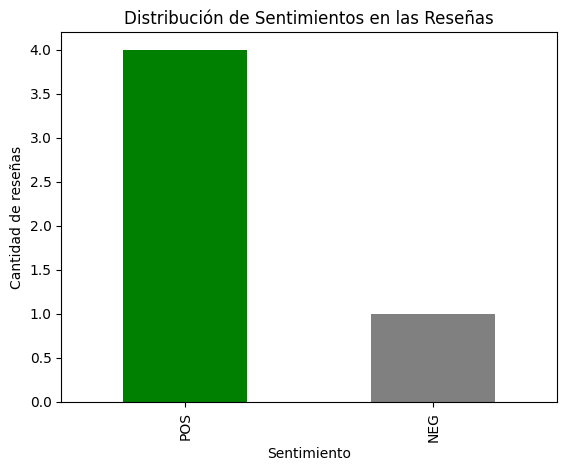

In [40]:
import matplotlib.pyplot as plt

conteo.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Distribución de Sentimientos en las Reseñas")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de reseñas")
plt.show()


##Parte 2: Extracción de información

###Tomá 2 de las reseñas que creaste (las más largas y detalladas)

In [41]:
reseñas_destacadas = [
    "Muy buena experiencia. Ambiente agradable, servicio amable, gran variedad de pizzas estilo italiano (a la piedra y bien finita). Recomendable la pizza grande 5 gustos para dos personas. Vienen dos porciones con huevo, 2 con hongos portobello, 2 de jamón y 2 con salame. La faina también está bien hecha. Si pagas en efectivo hay 10% de descuento. Volvería sin duda. Hacen delivery con Rappi. Según la mesera hasta 3 km es sin cargo. Luego hay un recargo de alrededor $400.",
    "Segunda vez que visito el lugar, la primera todo muy bueno y la atención de las meseras destacables por su amabilidad y predisposición. La segunda nos atendió un muchacho que deja mucho que desear, pedimos dos pizas y se olvidó de la segunda, luego de una larga espera y hacer nuevamente el pedido le encargo una segunda cerveza IPA, me trae una común y cuando le aviso que no es lo que pedí me insiste que es IPA, le explico que ni el color ni el sabor es el mismo que el anterior a lo que que me asegura que sí y que él no toma por eso no sabe de cervezas. Desde ya que no tomé lo que me trajo y lamento que tengan personal que discute con los clientes. espero que le expliquen cómo debe actuar o que siga el ejemplo sus compañeras."
]


###Extraé todas las entidades nombradas de esas reseñas

In [45]:
from transformers import pipeline
import pandas as pd

# Cargamos el modelo NER
ner_model = pipeline(
    "ner",
    model="mrm8488/bert-spanish-cased-finetuned-ner",
    tokenizer="mrm8488/bert-spanish-cased-finetuned-ner",
    aggregation_strategy="simple"  # agrupa tokens de una misma entidad
)

print("Modelo NER cargado correctamente.")

# Aplicamos el modelo a las reseñas
entidades = [ner_model(texto) for texto in reseñas_destacadas]

# Mostramos las entidades detectadas
for i, e in enumerate(entidades):
    print(f"\n=== Reseña {i+1} ===")
    for ent in e:
        print(f"{ent['word']} → {ent['entity_group']} (score={ent['score']:.2f})")


Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Modelo NER cargado correctamente.

=== Reseña 1 ===
Rappi → MISC (score=0.61)

=== Reseña 2 ===
IP → MISC (score=0.99)
IP → MISC (score=1.00)
##A → MISC (score=0.54)


###Organizá la información en categorías (personas, lugares, organizaciones)

In [46]:
# Estructuramos las entidades por tipo
info = {"PERSONA": [], "LUGAR": [], "ORGANIZACIÓN": []}

for reseña_entidades in entidades:
    for ent in reseña_entidades:
        tipo = ent["entity_group"]
        palabra = ent["word"]
        if tipo in ["PER"]:
            info["PERSONA"].append(palabra)
        elif tipo in ["LOC"]:
            info["LUGAR"].append(palabra)
        elif tipo in ["ORG"]:
            info["ORGANIZACIÓN"].append(palabra)

# Mostramos agrupadas
for categoria, palabras in info.items():
    print(f"\n{categoria}: {palabras}")



PERSONA: []

LUGAR: []

ORGANIZACIÓN: []


In [49]:
reseñas_destacadas_2 = [
    "Me gustó mucho la atencion de Roberto, el mesero. Ademas es de Quilmes igual que yo. Me recomendó la sede de Berazategui que tienen pizzas sin tac",
    "Muy caro para lo que ofrecen. Por lo mismo me voy a Palermo o pido por Rappi una pizza de Guerrin. Gerardo el mozo más lento imposible"
]

In [50]:
# Aplicamos el modelo a las reseñas
entidades = [ner_model(texto) for texto in reseñas_destacadas_2]

# Mostramos las entidades detectadas
for i, e in enumerate(entidades):
    print(f"\n=== Reseña {i+1} ===")
    for ent in e:
        print(f"{ent['word']} → {ent['entity_group']} (score={ent['score']:.2f})")


=== Reseña 1 ===
Roberto → PER (score=1.00)
Qui → ORG (score=0.73)
##lmes → ORG (score=0.83)
Berazategui → LOC (score=0.90)

=== Reseña 2 ===
Palermo → LOC (score=1.00)
Rap → PER (score=1.00)
##pi → PER (score=0.99)
Guerrin → MISC (score=0.70)
Ger → PER (score=1.00)
##ardo → PER (score=0.72)


Modelos como mrm8488/bert-spanish-cased-finetuned-ner no procesan palabras completas, sino que dividen el texto en subtokens o fragmentos.

"Qui ##lmes" → el modelo ve "Qui" y "##lmes" como dos tokens separados


In [51]:
# Estructuramos las entidades por tipo
info = {"PERSONA": [], "LUGAR": [], "ORGANIZACIÓN": []}

for reseña_entidades in entidades:
    for ent in reseña_entidades:
        tipo = ent["entity_group"]
        palabra = ent["word"]
        if tipo in ["PER"]:
            info["PERSONA"].append(palabra)
        elif tipo in ["LOC"]:
            info["LUGAR"].append(palabra)
        elif tipo in ["ORG"]:
            info["ORGANIZACIÓN"].append(palabra)

# Mostramos agrupadas
for categoria, palabras in info.items():
    print(f"\n{categoria}: {palabras}")


PERSONA: ['Roberto', 'Rap', '##pi', 'Ger', '##ardo']

LUGAR: ['Berazategui', 'Palermo']

ORGANIZACIÓN: ['Qui', '##lmes']


###Bonus: ¿Se mencionan nombres de platos? (Nota: el modelo podría no detectarlos como entidades, reflexioná sobre por qué)

El modelo NER no fue entrenado para detectar nombres de comida, sino para reconocer entidades “nombradas” típicas del lenguaje general: personas, lugares, organizaciones, fechas, etc.

Por eso, palabras como “pizza grande 5 gustos”, “fainá”, “cerveza IPA” o “hongos portobello” no aparecerán como entidades reconocidas, aunque para nosotros sí sean “nombres relevantes”

Detectar nombres de platos requeriría un modelo entrenado con datos del dominio gastronómico (por ejemplo, reseñas de restaurantes etiquetadas con nombres de comida).
En este caso, un modelo NER genérico no tiene ese conocimiento de contexto.

##Parte 3: Sistema de preguntas y respuestas

###Escribí un texto con información del restaurante (menú, horarios, ubicación, políticas de reservas, precios promedio, etc.). Mínimo 4-5 oraciones.

In [52]:
# Texto con información del restaurante
contexto = """
Pizzería Da leo está ubicada en Barracas, Buenos Aires, sobre la calle Brandsen 1435.
Abrimos de martes a domingo de 19:00 a 00:00 horas.
No es necesario reservar, pero recomendamos hacerlo los fines de semana.
Nuestro menú incluye pizzas napolitanas, empanadas y postres caseros.
El precio promedio por persona es de 25.000 pesos argentinos.
Ofrecemos delivery gratuito en un radio de 3 km y aceptamos todos los medios de pago, incluido Mercado Pago.
"""


###Cargá un modelo de Question Answering en español Formulá al menos 4 preguntas que un cliente podría hacer

In [53]:
from transformers import pipeline

# Cargar modelo de QA en español
qa_model = pipeline(
    "question-answering",
    model="mrm8488/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es"
)


Some weights of the model checkpoint at mrm8488/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


###Generá respuestas automáticas usando el modelo

In [54]:
preguntas = [
    "¿Dónde está ubicada la pizzería?",
    "¿Cuáles son los horarios de atención?",
    "¿Es necesario reservar?",
    "¿Hacen delivery y qué costo tiene?"
]


###Mostrá cada pregunta con su respuesta y el nivel de confianza del modelo

In [55]:
# Procesar las preguntas
resultados = []
for pregunta in preguntas:
    respuesta = qa_model(question=pregunta, context=contexto)
    resultados.append({
        "Pregunta": pregunta,
        "Respuesta": respuesta['answer'],
        "Confianza": round(respuesta['score'], 3)
    })

# Mostrar resultados en tabla
import pandas as pd

df_respuestas = pd.DataFrame(resultados)
df_respuestas


,Pregunta,Respuesta,Confianza
0,¿Dónde está ubicada la pizzería?,"Barracas, Buenos Aires, sobre la calle Brandse...",0.251
1,¿Cuáles son los horarios de atención?,martes a domingo de 19:00 a 00:00 horas,0.127
2,¿Es necesario reservar?,No,0.328
3,¿Hacen delivery y qué costo tiene?,gratuito,0.033


##Bonus (opcional): Integración completa

Si terminaste las tres partes, intentá crear una función que:

- Reciba una reseña de cliente como input
- Analice el sentimiento
- Extraiga entidades mencionadas
- Genere un resumen estructurado

In [56]:
# Instalamos dependencias
!pip install transformers sentencepiece torch --quiet
!pip install pysentimiento --quiet
!pip install pandas --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 15.6 MB/s eta 0:00:00


###Importar librerías y cargar modelos

In [57]:
from transformers import pipeline
from pysentimiento import create_analyzer
import pandas as pd

# --- 1. Modelo de análisis de sentimiento ---
sentiment_analyzer = create_analyzer(task="sentiment", lang="es")

# --- 2. Modelo de reconocimiento de entidades ---
ner_model = pipeline(
    "ner",
    model="mrm8488/bert-spanish-cased-finetuned-ner",
    aggregation_strategy="simple"
)


###Función integrada

In [58]:
def analizar_reseña(reseña):
    # --- Análisis de sentimiento ---
    sentimiento = sentiment_analyzer.predict(reseña)
    sentimiento_label = sentimiento.output
    sentimiento_probas = sentimiento.probas

    # --- Extracción de entidades ---
    entidades_raw = ner_model(reseña)
    entidades = {}
    for e in entidades_raw:
        tipo = e['entity_group']
        if tipo not in entidades:
            entidades[tipo] = []
        entidades[tipo].append(e['word'])

    # --- Resumen estructurado ---
    resumen = {
        "Reseña": reseña,
        "Sentimiento": sentimiento_label,
        "Confianza Sentimiento": round(sentimiento_probas[sentimiento_label], 3),
        "Entidades Detectadas": entidades if entidades else "No se detectaron entidades",
    }

    return resumen


###Ejemplo de reseña ingresada por el usuario

In [59]:
reseña = """
Ayer fuimos por primera vez a Pizzería Da Leo en San Telmo.
Nos encantó la atención de María y la pizza Afrodita fue un manjar.
El lugar es chico pero acogedor. Sin dudas volveremos pronto.
"""

resultado = analizar_reseña(reseña)

# Mostrar resultados en tabla
pd.DataFrame([{
    "Reseña": resultado["Reseña"],
    "Sentimiento": resultado["Sentimiento"],
    "Confianza": resultado["Confianza Sentimiento"],
    "Entidades": resultado["Entidades Detectadas"]
}])


,Reseña,Sentimiento,Confianza,Entidades
0,\nAyer fuimos por primera vez a Pizzería Da Le...,POS,0.975,"{'MISC': ['Pizzería Da Leo', 'Afrodita'], 'LOC..."


###Consola Interactiva

In [62]:
from transformers import pipeline
from pysentimiento import create_analyzer
import pandas as pd

# Modelo de sentimiento en español
sentiment_analyzer = create_analyzer(task="sentiment", lang="es")

# Modelo de reconocimiento de entidades
ner_model = pipeline(
    "ner",
    model="mrm8488/bert-spanish-cased-finetuned-ner",
    aggregation_strategy="simple"
)

print("Modelos cargados correctamente ✅")

# --- Función integrada ---
def analizar_reseña(reseña):
    # --- 1. Sentimiento ---
    sentimiento = sentiment_analyzer.predict(reseña)
    label = sentimiento.output

    # Algunos entornos no traen 'probas', entonces controlamos eso:
    try:
        confianza = round(sentimiento.probas[label], 3)
    except Exception:
        confianza = "N/D"

    # --- 2. Entidades ---
    entidades_raw = ner_model(reseña)
    entidades = {}
    for e in entidades_raw:
        tipo = e["entity_group"]
        entidades.setdefault(tipo, []).append(e["word"])

    # --- 3. Resumen estructurado ---
    resumen = {
        "Sentimiento": label,
        "Confianza": confianza,
        "Entidades": entidades if entidades else "No se detectaron entidades",
    }

    return resumen


# --- Consola interactiva ---
while True:
    reseña = input("\n🗣️ Ingresá una reseña de cliente (Enter vacío para terminar):\n> ")

    if reseña.lower() == "salir":
        print("👋 ¡Gracias por usar el analizador de reseñas!")
        break

    resultado = analizar_reseña(reseña)

    print("\n--- 🧾 RESULTADOS ---")
    print(f"🟢 Sentimiento: {resultado['Sentimiento']} (confianza: {resultado['Confianza']})")
    print(f"🏷️ Entidades detectadas: {resultado['Entidades']}")
    print("------------------------")


Modelos cargados correctamente ✅

🗣️ Ingresá una reseña de cliente (Enter vacío para terminar):
> Excelente, la pizza muy rica y tiene gran variedad para elegir. Lo que más destacó es la atención, super atentos. El ambiente agradable y bien decorado para una pizzeria

--- 🧾 RESULTADOS ---
🟢 Sentimiento: POS (confianza: 0.981)
🏷️ Entidades detectadas: No se detectaron entidades
------------------------


KeyboardInterrupt: Interrupted by user

In [63]:
# Pedimos la reseña solo una vez
reseña = input("\n🗣️ Ingresá una reseña de cliente (Enter vacío para terminar):\n> ")

# Si el usuario no escribe nada, terminamos
if reseña.strip() == "":
    print("👋 No ingresaste reseña. Finalizando.")
else:
    resultado = analizar_reseña(reseña)

    print("\n--- 🧾 RESULTADOS ---")
    print(f"🟢 Sentimiento: {resultado['Sentimiento']} (confianza: {resultado['Confianza']})")
    print(f"🏷️ Entidades detectadas: {resultado['Entidades']}")
    print("------------------------")



🗣️ Ingresá una reseña de cliente (Enter vacío para terminar):
> Hermosa lugar para algun festejo familiar. Las pizzas son muy ricas y los precios accesibles. Nos juntamos con la flia para festejar mi cumple y todos quedaron super conformes por el lugar, la comida y la atencion. Gracias Gaston y Rocio por la amabilidad desde el primer minuto.

--- 🧾 RESULTADOS ---
🟢 Sentimiento: POS (confianza: 0.978)
🏷️ Entidades detectadas: {'PER': ['Gas', '##ton', 'Roc', '##io']}
------------------------


###Integración completa de análisis de reseñas

### Reflexión personal

Después de completar el ejercicio, respondé estas preguntas:

1. **¿Qué fue lo más difícil del ejercicio?**
   - (Escribí tu respuesta acá)

2. **¿Encontraste alguna limitación en los modelos?**
   - (Escribí tu respuesta acá)

3. **¿Cómo podrías mejorar este sistema para un caso real?**
   - (Escribí tu respuesta acá)

4. **¿Qué otras aplicaciones se te ocurren para estas técnicas en el contexto argentino?**
   - (Escribí tu respuesta acá)

---

---

## Reflexiones Finales del Curso

Completaste los cuatro ejercicios de NLP con Transformers, incluyendo un desafío autónomo. Vamos a reflexionar sobre lo aprendido:

### Ejercicio 1 - Moderación de Comentarios
- **Aprendiste:** A clasificar texto usando modelos de análisis de sentimientos
- **Aplicación:** Moderación automática de redes sociales, priorización de tickets de soporte
- **Limitaciones:** Los modelos pueden tener problemas con ironía, sarcasmo o lenguaje muy coloquial

### Ejercicio 2 - Extracción de CVs
- **Aprendiste:** A extraer entidades nombradas (personas, organizaciones, lugares) de texto
- **Aplicación:** Automatización de RRHH, análisis de documentos, extracción de información estructurada
- **Limitaciones:** Algunos modelos pueden confundir entidades o no detectar nombres poco comunes

### Ejercicio 3 - Chatbot de Soporte
- **Aprendiste:** A usar Question Answering para responder preguntas basadas en un contexto
- **Aplicación:** Chatbots, asistentes virtuales, sistemas de FAQ automáticas
- **Limitaciones:** El modelo solo puede responder sobre información presente en el contexto

### Ejercicio 4 - Desafío Autónomo
- **Aprendiste:** A combinar múltiples técnicas de NLP para resolver un problema real completo
- **Aplicación:** Sistemas integrados de análisis de feedback, gestión de reputación online
- **Habilidad clave:** Autonomía para investigar, implementar y evaluar soluciones de NLP

### Próximos pasos sugeridos

1. **Explorá más modelos** en [Hugging Face Hub](https://huggingface.co/models)
2. **Combiná técnicas:** Por ejemplo, usá clasificación de sentimientos + QA para un chatbot más inteligente
3. **Experimentá con otros idiomas** o dialectos regionales
4. **Investigá fine-tuning:** Aprendé a ajustar modelos con tus propios datos
5. **Desarrollá un proyecto propio:** Elegí un problema real que te interese y aplicá estas técnicas

---

## Glosario Técnico

### Conceptos fundamentales

**Transformer**  
Arquitectura de red neuronal basada en mecanismos de atención que revolucionó el NLP en 2017. Permite procesar secuencias de texto completas simultáneamente en lugar de palabra por palabra.

**Pipeline**  
Interfaz de alto nivel en Hugging Face que encapsula todo el proceso de preprocesamiento, inferencia y postprocesamiento de un modelo. Facilita el uso de modelos preentrenados con pocas líneas de código.

**Modelo preentrenado**  
Modelo de machine learning que fue entrenado previamente con grandes cantidades de datos. Puede usarse directamente o ajustarse (fine-tuning) para tareas específicas.

**Tokenización**  
Proceso de dividir texto en unidades más pequeñas (tokens) que el modelo puede procesar. Puede ser a nivel de palabras, subpalabras o caracteres.

### Tareas de NLP

**Text Classification (Clasificación de texto)**  
Tarea de asignar una o más etiquetas a un texto. Incluye análisis de sentimientos, detección de spam, clasificación de temas, etc.

**Sentiment Analysis (Análisis de sentimientos)**  
Subtipo de clasificación que identifica la polaridad emocional de un texto (positivo, negativo, neutral). Se usa en redes sociales, reseñas de productos, atención al cliente.

**Named Entity Recognition - NER (Reconocimiento de entidades nombradas)**  
Tarea de identificar y clasificar nombres propios en texto: personas (PER), organizaciones (ORG), ubicaciones (LOC), fechas, cantidades monetarias, etc.

**Question Answering - QA (Respuesta a preguntas)**  
Tarea de responder preguntas en lenguaje natural basándose en un contexto dado. El modelo extrae la respuesta directamente del texto proporcionado.

**Text Generation (Generación de texto)**  
Tarea de crear texto nuevo de manera coherente a partir de un prompt inicial. Incluye completado de texto, escritura creativa, chatbots conversacionales.

**Summarization (Resumen automático)**  
Tarea de condensar un texto largo en una versión más corta manteniendo la información más importante.

**Translation (Traducción automática)**  
Tarea de traducir texto de un idioma a otro usando modelos de secuencia a secuencia.

### Componentes técnicos

**Embedding (Representación vectorial)**  
Representación numérica de palabras o tokens como vectores en un espacio multidimensional. Palabras con significados similares tienen embeddings cercanos.

**Attention (Atención)**  
Mecanismo que permite al modelo enfocarse en diferentes partes del input al procesar cada elemento. Es el componente clave de la arquitectura Transformer.

**Fine-tuning (Ajuste fino)**  
Proceso de tomar un modelo preentrenado y entrenarlo adicionalmente con datos específicos de tu dominio para mejorar su desempeño en tu tarea particular.

**Inference (Inferencia)**  
Proceso de usar un modelo ya entrenado para hacer predicciones sobre datos nuevos. No implica entrenamiento, solo aplicación del modelo.

**Score / Confidence (Puntuación / Confianza)**  
Valor numérico (generalmente entre 0 y 1) que indica qué tan seguro está el modelo de su predicción. Valores más altos indican mayor confianza.

### Modelos mencionados

**BETO**  
Versión de BERT (Bidirectional Encoder Representations from Transformers) entrenada específicamente con texto en español. Usado en análisis de sentimientos y otras tareas de clasificación.

**RoBERTa**  
Variante optimizada de BERT con mejoras en el proceso de preentrenamiento. Usado para múltiples tareas de NLP en español.

**BERT (Bidirectional Encoder Representations from Transformers)**  
Modelo Transformer que lee texto bidireccionalmente (izquierda a derecha y derecha a izquierda simultáneamente) para comprender mejor el contexto.

**GPT (Generative Pre-trained Transformer)**  
Familia de modelos diseñados específicamente para generación de texto. Leen texto de izquierda a derecha y predicen la siguiente palabra.

### Plataformas y librerías

**Hugging Face**  
Plataforma y empresa que desarrolla herramientas de NLP de código abierto. Su librería Transformers es el estándar de facto para trabajar con modelos de lenguaje.

**Hugging Face Hub**  
Repositorio online con miles de modelos preentrenados, datasets y demos interactivas. Permite compartir y descargar modelos fácilmente.

**PyTorch / TensorFlow**  
Frameworks de deep learning usados como backend por la librería Transformers. PyTorch es más común en investigación, TensorFlow en producción.

### Métricas y evaluación

**Label (Etiqueta)**  
Categoría asignada por el modelo a un texto. En análisis de sentimientos: POS (positivo), NEG (negativo), NEU (neutral).

**Aggregation strategy (Estrategia de agregación)**  
En NER, método para combinar tokens que pertenecen a la misma entidad. Por ejemplo, "Buenos" y "Aires" se agrupan en una sola entidad "Buenos Aires".

**Context (Contexto)**  
En QA, el documento o párrafo que contiene la información necesaria para responder la pregunta. El modelo busca la respuesta dentro de este contexto.

---

## Recursos adicionales

- **Documentación oficial de Transformers:** https://huggingface.co/docs/transformers
- **Modelos en español:** https://huggingface.co/models?language=es
- **Curso gratuito de Hugging Face:** https://huggingface.co/course
- **Comunidad en español:** https://huggingface.co/spaces

---

*Este cuaderno fue diseñado con fines educativos para estudiantes de NLP en Argentina.*